# Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data¶


In [1]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report
sns.set_theme(style='darkgrid')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = 200
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("wine.csv")
df

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#EDA

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [8]:
df.shape

(178, 14)

In [9]:
#finding duplicates
df.duplicated().sum()

0

In [10]:
#finding missing values
df.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

<Axes: >

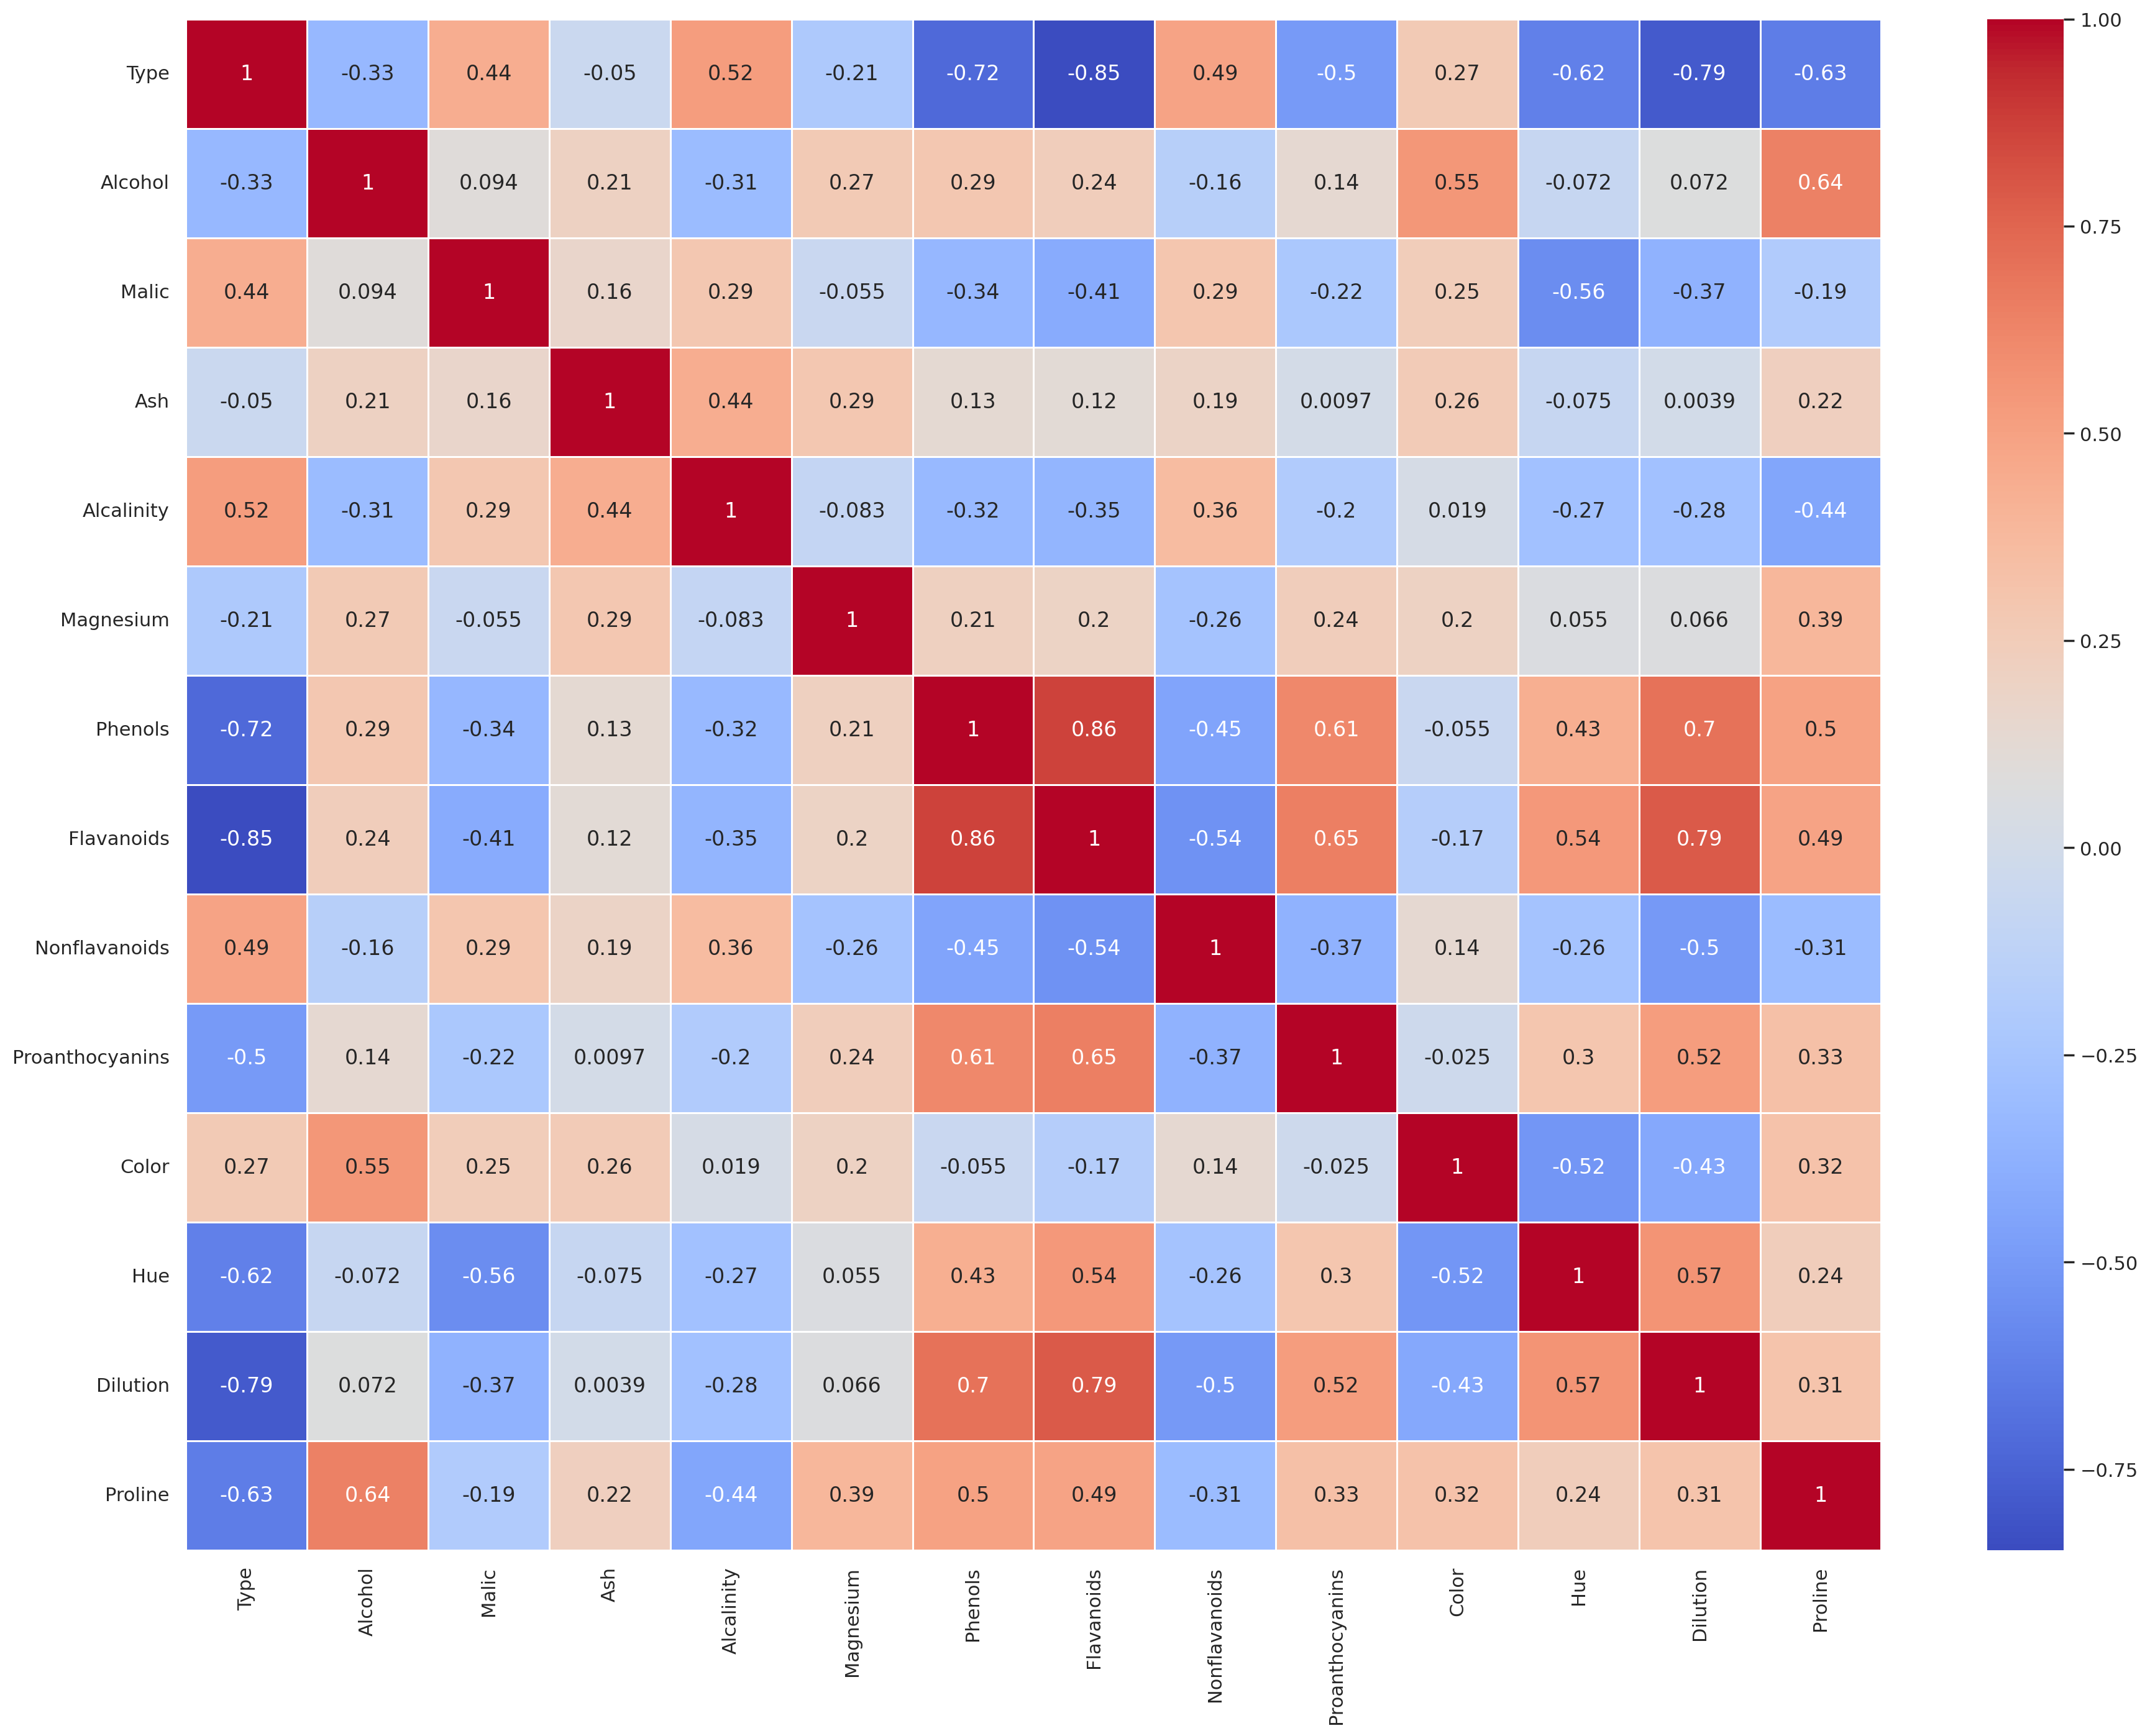

In [11]:
# Assuming 'df' is your DataFrame
s = df.select_dtypes(include="number").corr()

# Set the size of the heatmap
plt.figure(figsize=(22, 16))

# Customize the heatmap with annotations and a different color map (e.g., 'coolwarm')
sns.heatmap(s, annot=True, cmap='coolwarm', linewidths=.5)

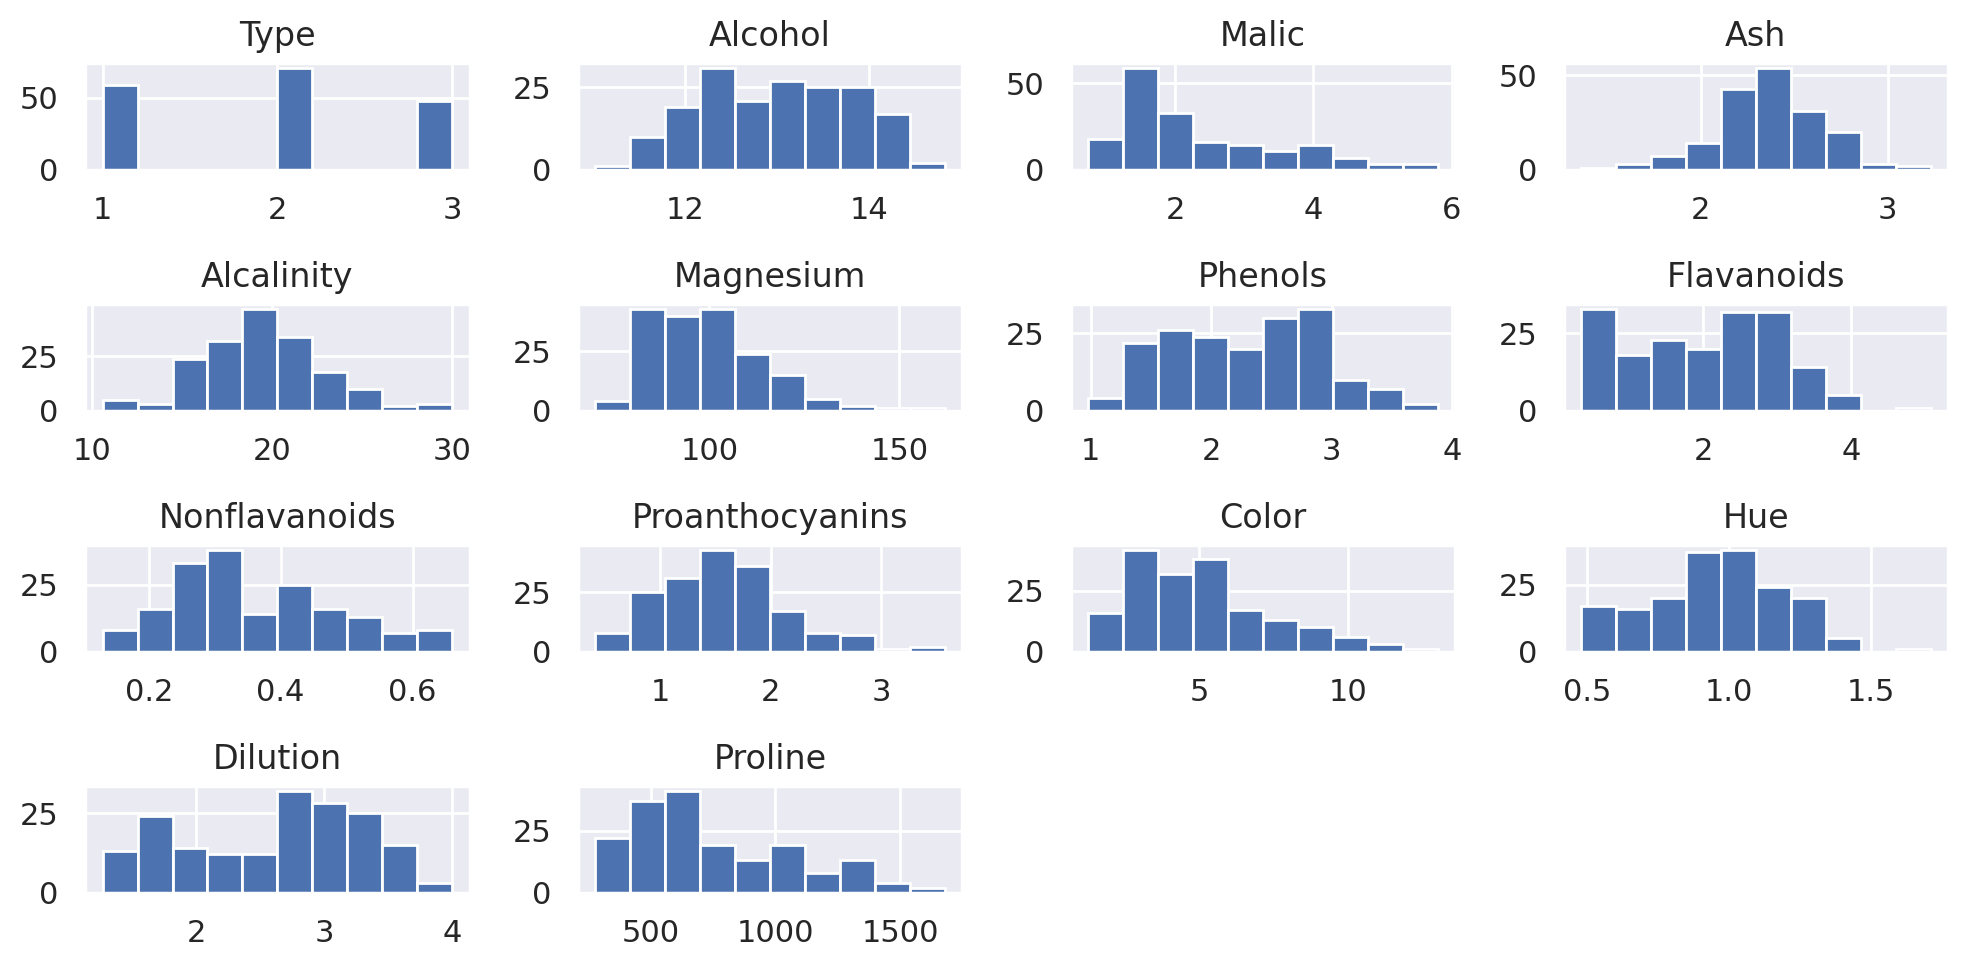

In [12]:
#histogram
df.hist()
plt.tight_layout()

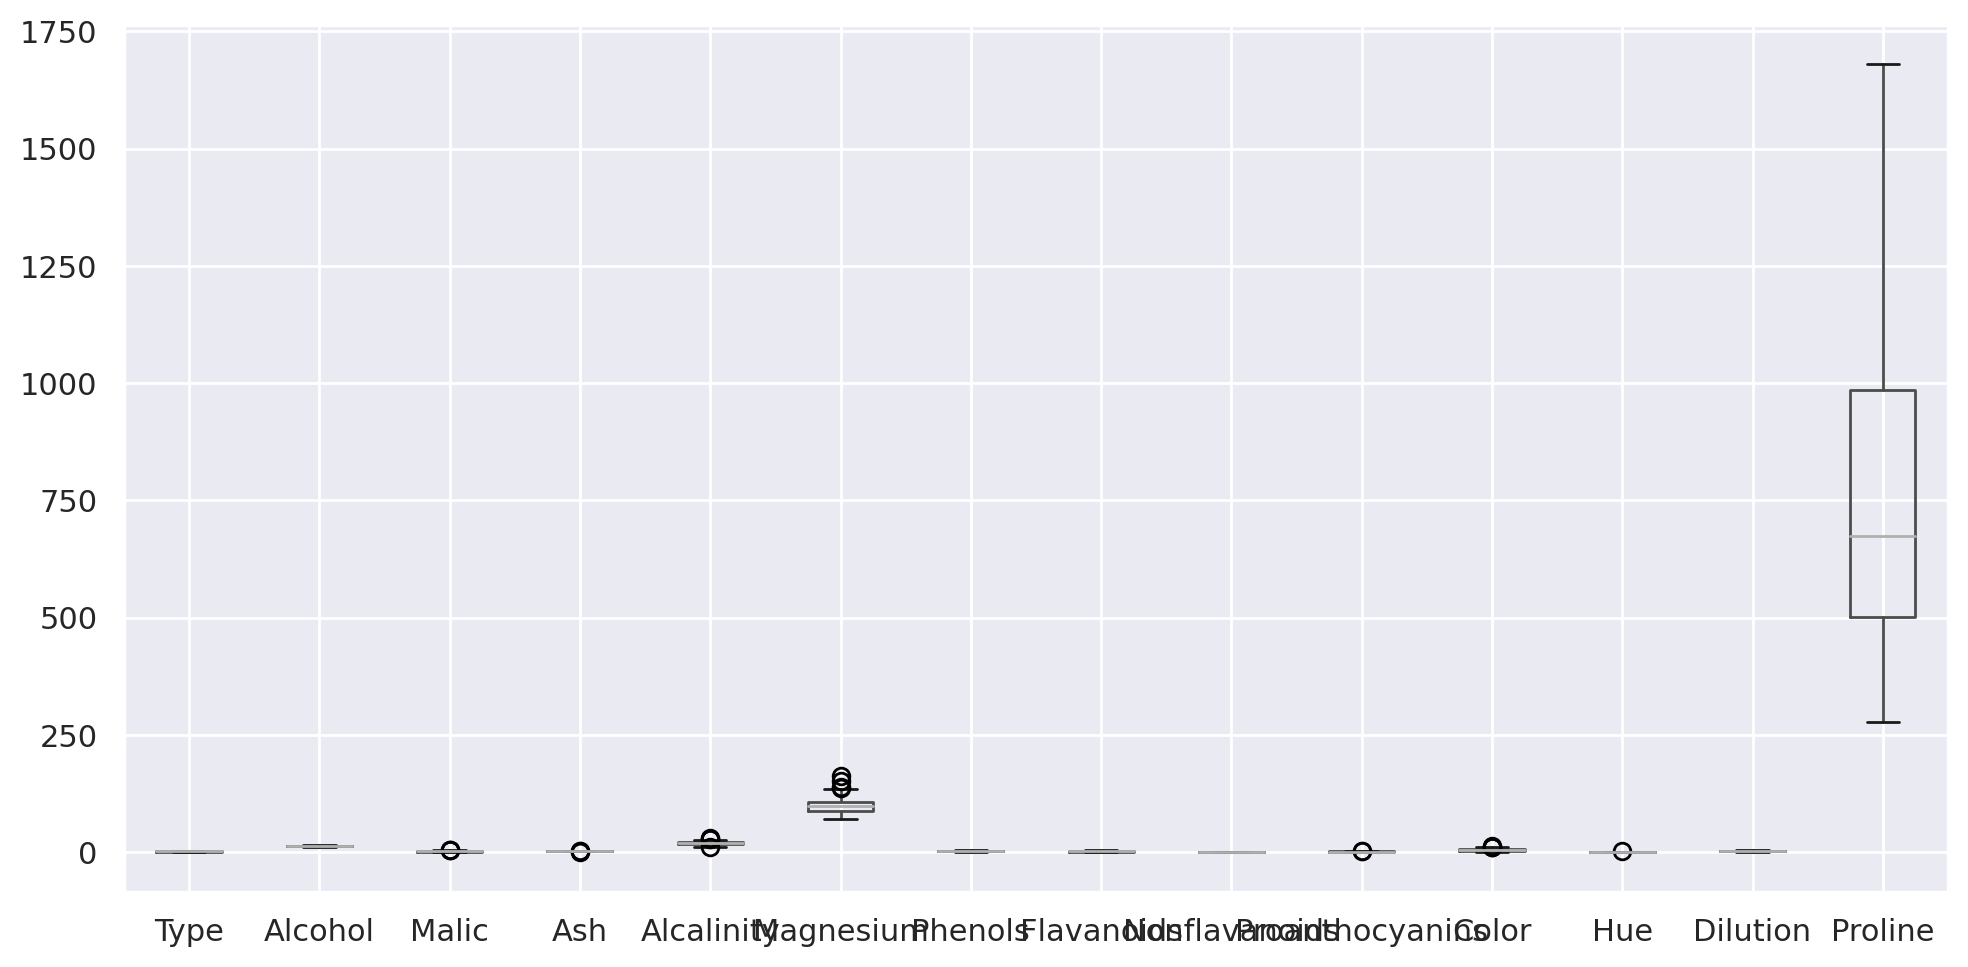

In [13]:
#boxplot
df.boxplot()
plt.tight_layout()

#To teal with outliers

In [14]:
df.columns

Index(['Type', 'Alcohol', 'Malic', 'Ash', 'Alcalinity', 'Magnesium', 'Phenols',
       'Flavanoids', 'Nonflavanoids', 'Proanthocyanins', 'Color', 'Hue',
       'Dilution', 'Proline'],
      dtype='object')

In [16]:
import numpy as np
def whisker(data):
    # Calculate the first and third quartiles (Q1 and Q3)
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1
    # Set the lower and upper whiskers
    lw = Q1 - 1.5 * IQR
    uw = Q3 + 1.5 * IQR
    return lw, uw

# Now you can use the whisker function in your loop
for i in ['Malic', 'Ash', 'Alcalinity', 'Magnesium',
        'Proanthocyanins', 'Color', 'Hue']:
    lw, uw = whisker(df[i])
    df[i] = np.where(df[i] < lw, lw, df[i])
    df[i] = np.where(df[i] > uw, uw, df[i])


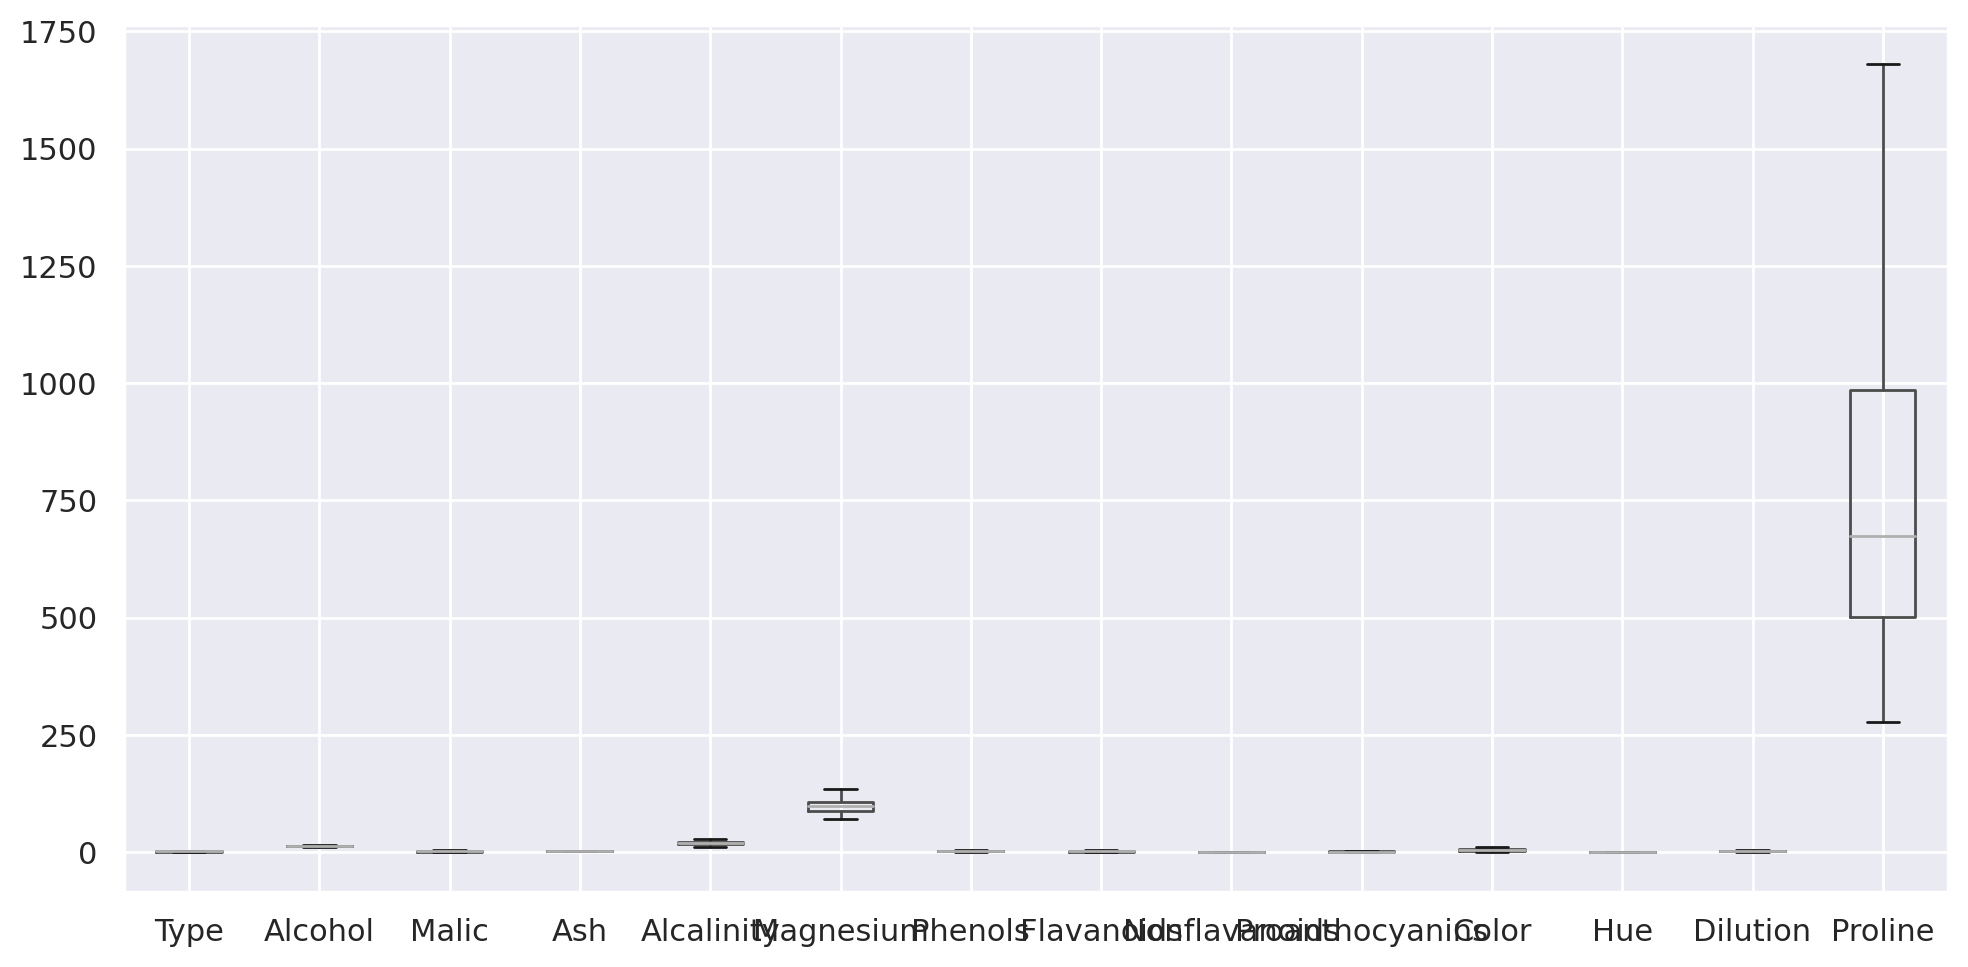

In [17]:
#boxplot
df.boxplot()
plt.tight_layout()

#PCA

In [18]:
x = df.iloc[:,:-1]

In [19]:
x

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
0,1,14.23,1.7100,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92
1,1,13.20,1.7800,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40
2,1,13.16,2.3600,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17
3,1,14.37,1.9500,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45
4,1,13.24,2.5900,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.3025,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74
174,3,13.40,3.9100,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56
175,3,13.27,4.2800,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56
176,3,13.17,2.5900,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62


In [20]:
x.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.330435,2.366721,19.478090,99.483146,2.295112,2.029270,0.361854,1.586067,5.038146,0.956979,2.611685
std,0.775035,0.811827,1.100173,0.263705,3.287757,13.414186,0.625851,0.998859,0.124453,0.558153,2.260881,0.227095,0.709990
min,1.000000,11.030000,0.740000,1.688750,10.750000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000
max,3.000000,14.830000,5.302500,3.078750,27.950000,135.500000,3.880000,5.080000,0.660000,3.000000,10.670000,1.626250,4.000000


In [21]:
sc = StandardScaler()

x = sc.fit_transform(x)
pd.DataFrame(x).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,178.000000,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,1.596725e-16,-8.382808e-16,2.395088e-16,-4.478315e-16,-3.592632e-16,-7.983626e-17,0.000000,-3.991813e-16,3.592632e-16,2.395088e-16,-4.989766e-17,-7.983626e-17,3.193450e-16
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-1.213944e+00,-2.434235e+00,-1.449701e+00,-2.578195e+00,-2.662213e+00,-2.204108e+00,-2.107246,-1.695971e+00,-1.868234e+00,-2.113014e+00,-1.666938e+00,-2.106273e+00,-1.895054e+00
25%,-1.213944e+00,-7.882448e-01,-6.635217e-01,-5.959788e-01,-6.948555e-01,-8.584597e-01,-0.885468,-8.275393e-01,-7.401412e-01,-6.038048e-01,-8.064445e-01,-7.704749e-01,-9.522483e-01
50%,7.996036e-02,6.099988e-02,-4.242499e-01,-2.555683e-02,6.682950e-03,-1.108774e-01,0.095960,1.061497e-01,-1.760948e-01,-5.581813e-02,-1.544213e-01,3.541993e-02,2.377348e-01
75%,1.373864e+00,8.361286e-01,6.855158e-01,7.254987e-01,6.167164e-01,5.619467e-01,0.808997,8.490851e-01,6.095413e-01,6.538695e-01,5.153441e-01,7.198786e-01,7.885875e-01
max,1.373864e+00,2.259772e+00,2.709072e+00,2.707715e+00,2.584074e+00,2.692556e+00,2.539515,3.062832e+00,2.402403e+00,2.540381e+00,2.498027e+00,2.955409e+00,1.960915e+00


In [22]:
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.26695425,
         0.36660959,  1.84791957],
       [-1.21394365,  0.24628963, -0.50172839, ..., -0.2919228 ,
         0.41076822,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.28469638,
         0.32245097,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ...,  2.28955693,
        -1.6205284 , -1.48544548],
       [ 1.37386437,  0.20923168,  0.23659622, ...,  1.89035903,
        -1.57636978, -1.40069891],
       [ 1.37386437,  1.39508604,  1.61297912, ...,  1.84600371,
        -1.53221115, -1.42894777]])

In [23]:
pca = PCA()
pcs = pca.fit_transform(x)

In [24]:
pd.DataFrame(pcs)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-3.293568,-1.836984,-0.360199,-0.598959,0.405371,-0.290460,0.712398,-0.127018,0.770583,0.723463,0.377128,-0.584150,0.292071
1,-2.376301,0.477639,-1.959830,-0.373350,-0.376148,-1.003108,0.008721,0.992652,0.195468,-0.209357,0.315821,-0.231704,0.116925
2,-2.472691,-1.123248,0.938647,0.933144,0.036054,0.556486,0.424126,-0.213568,0.646280,-0.904567,0.107031,0.124684,-0.154070
3,-3.269863,-2.728174,-0.364615,0.589508,-0.049639,0.276844,-0.409367,0.724145,-0.260356,0.537460,-0.245872,-0.315926,-0.209806
4,-1.404746,-1.403226,1.950082,-0.618479,-0.063651,-0.637853,0.521193,0.278976,0.245380,-0.125235,-0.230904,0.230732,-0.319116
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3.832797,-1.664710,-0.454631,1.045954,-0.512037,-1.034568,0.615369,-0.180071,-0.340385,-0.099922,0.086406,-0.227080,0.039134
174,3.163176,-1.422289,0.139659,0.359965,0.347755,0.034005,0.116430,-0.531378,-0.281075,-0.034414,-0.253423,-0.045987,-0.134032
175,3.386907,-2.373524,-1.156482,-0.078263,1.141945,0.152287,0.880617,0.052079,-0.386645,0.181356,0.767645,0.051096,-0.106087
176,3.071442,-1.900556,-0.644610,-0.874338,0.506166,1.119825,0.890110,0.400445,0.268865,0.495205,0.373383,-0.174272,0.013216


In [25]:
pca.explained_variance_ratio_

array([0.4023618 , 0.1714401 , 0.10728536, 0.06809981, 0.06245753,
       0.05071161, 0.04040073, 0.02727332, 0.02030096, 0.02017235,
       0.01353882, 0.01070433, 0.00525326])

In [26]:
np.cumsum(pca.explained_variance_ratio_)

array([0.4023618 , 0.5738019 , 0.68108727, 0.74918708, 0.81164461,
       0.86235622, 0.90275695, 0.93003027, 0.95033124, 0.97050359,
       0.98404241, 0.99474674, 1.        ])

Text(0.5, 1.0, 'Scree Plot')

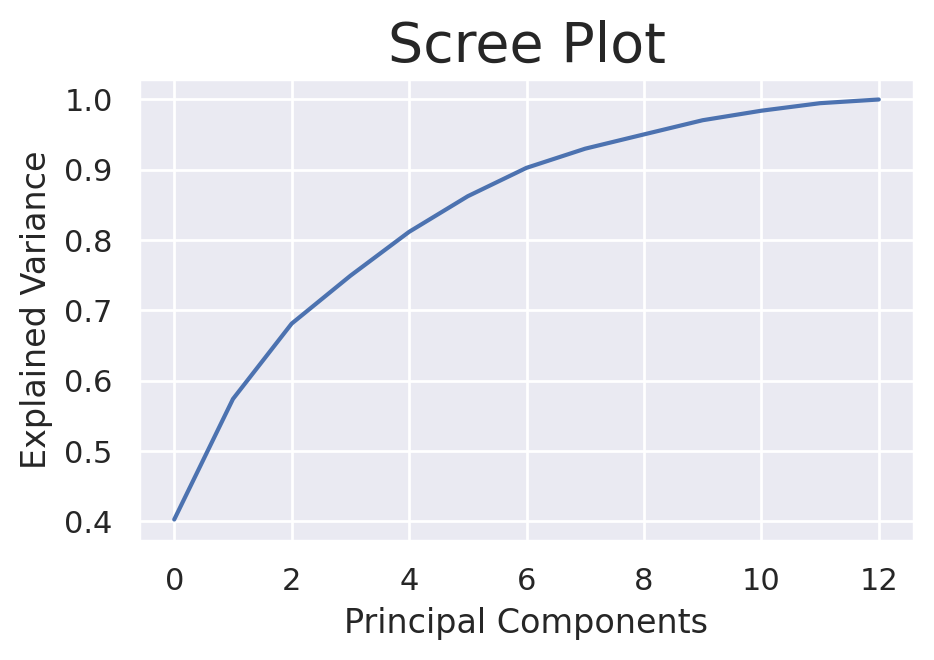

In [27]:
plt.figure(figsize=(5,3),dpi=200)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance')
plt.title('Scree Plot', size = 20)

In [28]:
selected_columns = pcs[:, [6,7,8]]
data = pd.DataFrame(selected_columns, columns=['PC6','PC7','PC8'])
data

,PC6,PC7,PC8
0,0.712398,-0.127018,0.770583
1,0.008721,0.992652,0.195468
2,0.424126,-0.213568,0.646280
3,-0.409367,0.724145,-0.260356
4,0.521193,0.278976,0.245380
...,...,...,...
173,0.615369,-0.180071,-0.340385
174,0.116430,-0.531378,-0.281075
175,0.880617,0.052079,-0.386645
176,0.890110,0.400445,0.268865


# Hierarchical Clustering¶


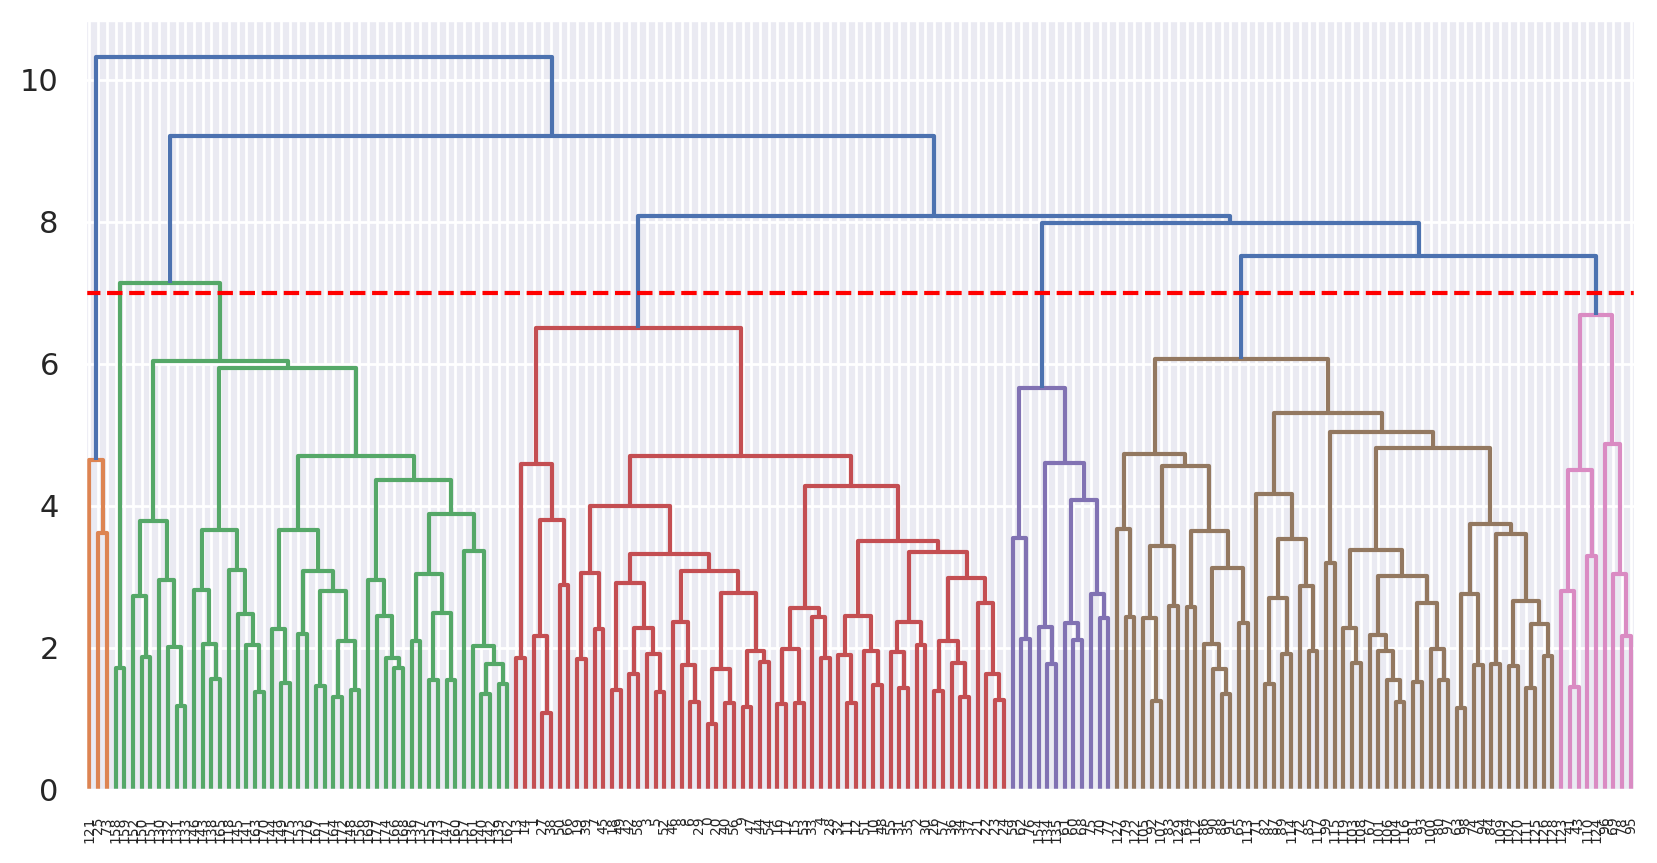

In [29]:
from scipy.cluster import hierarchy
lk = hierarchy.linkage(x, method='complete')
dendrogram = hierarchy.dendrogram(lk)
plt.axhline(y = 7, linestyle = '--', color = 'red')

# model building

In [30]:
from sklearn.cluster import AgglomerativeClustering

In [31]:
hc = AgglomerativeClustering(n_clusters=7)

ypred = hc.fit_predict(x)
ypred

array([4, 4, 2, 4, 2, 4, 4, 4, 4, 4, 2, 4, 4, 4, 4, 2, 2, 2, 4, 4, 4, 2,
       4, 2, 2, 2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 2, 4, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0, 1, 1, 0, 0, 1, 0,
       4, 0, 1, 5, 1, 2, 1, 2, 0, 1, 0, 1, 5, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 5, 5, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 1, 0, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 6, 6, 6, 3,
       3, 3, 3, 3, 6, 6, 3, 3, 3, 3, 3, 3, 6, 3, 6, 6, 3, 3, 3, 3, 3, 3,
       3, 6])

In [32]:
data

,PC6,PC7,PC8
0,0.712398,-0.127018,0.770583
1,0.008721,0.992652,0.195468
2,0.424126,-0.213568,0.646280
3,-0.409367,0.724145,-0.260356
4,0.521193,0.278976,0.245380
...,...,...,...
173,0.615369,-0.180071,-0.340385
174,0.116430,-0.531378,-0.281075
175,0.880617,0.052079,-0.386645
176,0.890110,0.400445,0.268865


In [33]:
data['cluster'] = ypred
data

,PC6,PC7,PC8,cluster
0,0.712398,-0.127018,0.770583,4
1,0.008721,0.992652,0.195468,4
2,0.424126,-0.213568,0.646280,2
3,-0.409367,0.724145,-0.260356,4
4,0.521193,0.278976,0.245380,2
...,...,...,...,...
173,0.615369,-0.180071,-0.340385,3
174,0.116430,-0.531378,-0.281075,3
175,0.880617,0.052079,-0.386645,3
176,0.890110,0.400445,0.268865,3


In [34]:
data[data['cluster']==0].mean()

PC6       -0.252102
PC7        0.161617
PC8       -0.107964
cluster    0.000000
dtype: float64

In [35]:
data[data['cluster'] == 1]

,PC6,PC7,PC8,cluster
60,1.037942,0.946764,-0.660136,1
61,0.429747,0.894982,-0.610401,1
64,0.541376,-0.240447,-0.598786,1
68,0.354859,1.062664,-0.383051,1
70,0.290257,-0.523880,1.004768,1
72,-1.701810,-1.038927,0.093875,1
75,0.597450,0.018231,-0.532821,1
77,1.082476,0.773363,0.098703,1
79,1.085139,-0.508506,-0.974270,1
82,-0.837174,-0.822801,-0.048950,1


In [36]:
#Analyzing the clusters
data.groupby('cluster').agg('mean')

,PC6,PC7,PC8
cluster,,,
0,-0.252102,0.161617,-0.107964
1,0.330902,-0.052166,0.050783
2,-0.168596,-0.120114,0.029173
3,0.045903,0.036536,-0.070499
4,0.046127,0.089289,0.076858
5,1.601970,-0.637183,0.477719
6,-0.638697,-0.338158,-0.039910


In [37]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=178, centers=7, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.5430


# k mean clustering

In [38]:
sc = StandardScaler()

x = sc.fit_transform(df)
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [39]:
from sklearn.cluster import KMeans

In [40]:
data.head()

,PC6,PC7,PC8,cluster
0,0.712398,-0.127018,0.770583,4
1,0.008721,0.992652,0.195468,4
2,0.424126,-0.213568,0.646280,2
3,-0.409367,0.724145,-0.260356,4
4,0.521193,0.278976,0.245380,2


In [41]:
km = KMeans()
yp = km.fit_predict(x)
yp

array([2, 2, 4, 2, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 2, 4,
       2, 4, 4, 4, 4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 4, 2, 2, 2, 2, 2, 7,
       2, 4, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 6, 3, 3, 6, 7, 3, 7,
       6, 6, 3, 0, 3, 7, 6, 0, 7, 6, 6, 3, 0, 7, 6, 6, 3, 5, 7, 6, 3, 3,
       3, 3, 3, 3, 3, 7, 7, 0, 0, 6, 7, 7, 6, 6, 7, 6, 6, 3, 6, 3, 6, 7,
       7, 6, 3, 3, 3, 3, 6, 6, 5, 6, 7, 0, 3, 7, 7, 7, 7, 3, 3, 3, 1, 5,
       1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 1, 5, 5, 5, 1, 1, 1, 1, 1, 1,
       1, 5, 1, 5, 1, 1, 5, 5, 5, 5, 1, 5, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1,
       1, 1], dtype=int32)

In [42]:
len(yp)

178

In [43]:
#cluster centre
km.cluster_centers_

array([[ 7.99603601e-02, -9.53976164e-01, -6.74915638e-01,
         7.50592663e-02,  5.65880241e-01,  2.46828171e+00,
         1.49370907e-01,  3.65507810e-01, -7.26711498e-01,
         1.23778969e+00, -7.04427296e-01,  6.97799259e-01,
         4.21352323e-01, -7.21580042e-04],
       [ 1.37386437e+00,  3.65698574e-01,  5.80691941e-01,
         3.43632929e-01,  6.86616019e-01,  3.06522761e-01,
        -9.29532335e-01, -1.10530344e+00,  3.47662644e-01,
        -3.97935472e-01,  1.71922139e+00, -1.44941374e+00,
        -1.42129703e+00, -3.59640562e-01],
       [-1.21394365e+00,  1.10171062e+00, -3.60697246e-01,
        -1.30134181e-01, -1.09984987e+00,  4.20736730e-01,
         9.94155707e-01,  1.07190995e+00, -8.11766118e-01,
         7.76143379e-01,  3.67492980e-01,  3.86235648e-01,
         8.39984680e-01,  1.28431010e+00],
       [ 7.99603601e-02, -1.08007613e+00, -4.10197404e-01,
         1.40816240e-01,  6.27519033e-01, -6.37299949e-01,
        -5.69675375e-01, -3.25137631e-01,  9.

In [44]:
x

array([[-1.21394365,  1.51861254, -0.56553422, ...,  0.36660959,
         1.84791957,  1.01300893],
       [-1.21394365,  0.24628963, -0.50172839, ...,  0.41076822,
         1.1134493 ,  0.96524152],
       [-1.21394365,  0.19687903,  0.02694849, ...,  0.32245097,
         0.78858745,  1.39514818],
       ...,
       [ 1.37386437,  0.33275817,  1.77705125, ..., -1.6205284 ,
        -1.48544548,  0.28057537],
       [ 1.37386437,  0.20923168,  0.23659622, ..., -1.57636978,
        -1.40069891,  0.29649784],
       [ 1.37386437,  1.39508604,  1.61297912, ..., -1.53221115,
        -1.42894777, -0.59516041]])

In [45]:
#Visualize the clusters
x[:,0]

array([-1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365, -1.21394365,
       -1.21394365, -1.21394365, -1.21394365, -1.21394365,  0.07996036,
        0.07996036,  0.07996036,  0.07996036,  0.07996036,  0.07996036,
        0.07996036,  0.07996036,  0.07996036,  0.07996036,  0.07

In [46]:
x[:,1]

array([ 1.51861254,  0.24628963,  0.19687903,  1.69154964,  0.29570023,
        1.48155459,  1.71625494,  1.3086175 ,  2.25977152,  1.0615645 ,
        1.3580281 ,  1.38273339,  0.92568536,  2.16095032,  1.70390229,
        0.77745356,  1.60508109,  1.02450655,  1.46920194,  0.78980621,
        1.3086175 , -0.08723191,  0.87627476, -0.18605311,  0.61686912,
        0.06099988,  0.48098997,  0.36981612,  1.07391715,  1.2592069 ,
        0.90098006,  0.71569031,  0.83921681,  0.93803801,  0.62922177,
        0.59216382,  0.34511082,  0.06099988,  0.08570518,  1.50625989,
        0.69098501,  0.50569527,  1.0862698 ,  0.29570023,  0.06099988,
        1.49390724,  1.70390229,  1.1109751 ,  1.3580281 ,  1.1603857 ,
        0.06099988,  1.02450655,  1.01215391,  0.95039066,  0.91333271,
        0.69098501,  1.50625989,  0.35746347,  0.88862741, -0.77898029,
       -0.82839089, -0.44545875,  0.82686416, -0.77898029, -1.02603329,
       -0.77898029,  0.13511578, -0.77898029,  0.41922672, -0.97

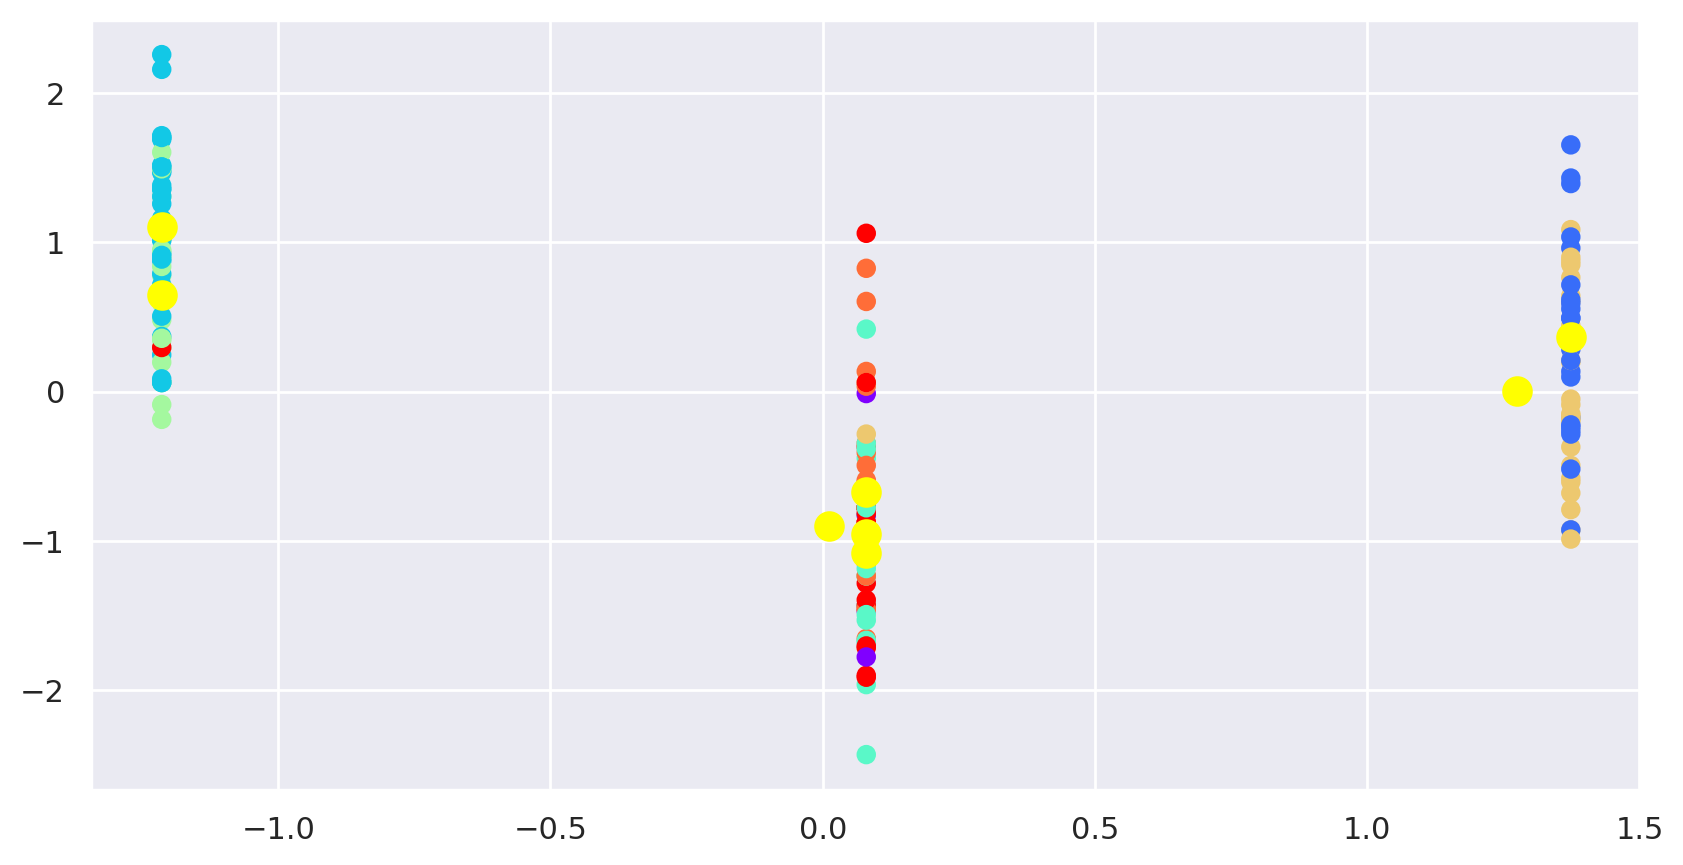

In [47]:
plt.scatter(x[:,0],x[:,1], c = yp, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow', s = 100)

In [48]:
wcss = []

for i in range(1,11):
    km = KMeans(n_clusters=i)
    km.fit_predict(x)
    wcss.append(km.inertia_)

In [49]:
wcss

[2492.0,
 1723.1267750316522,
 1273.2901954675076,
 1173.8269363934676,
 1100.4139304848577,
 1054.2987193753443,
 1016.0383337289943,
 953.5941134726023,
 915.944239181873,
 870.4789953660038]

Text(0.5, 1.0, 'Elbow Graph')

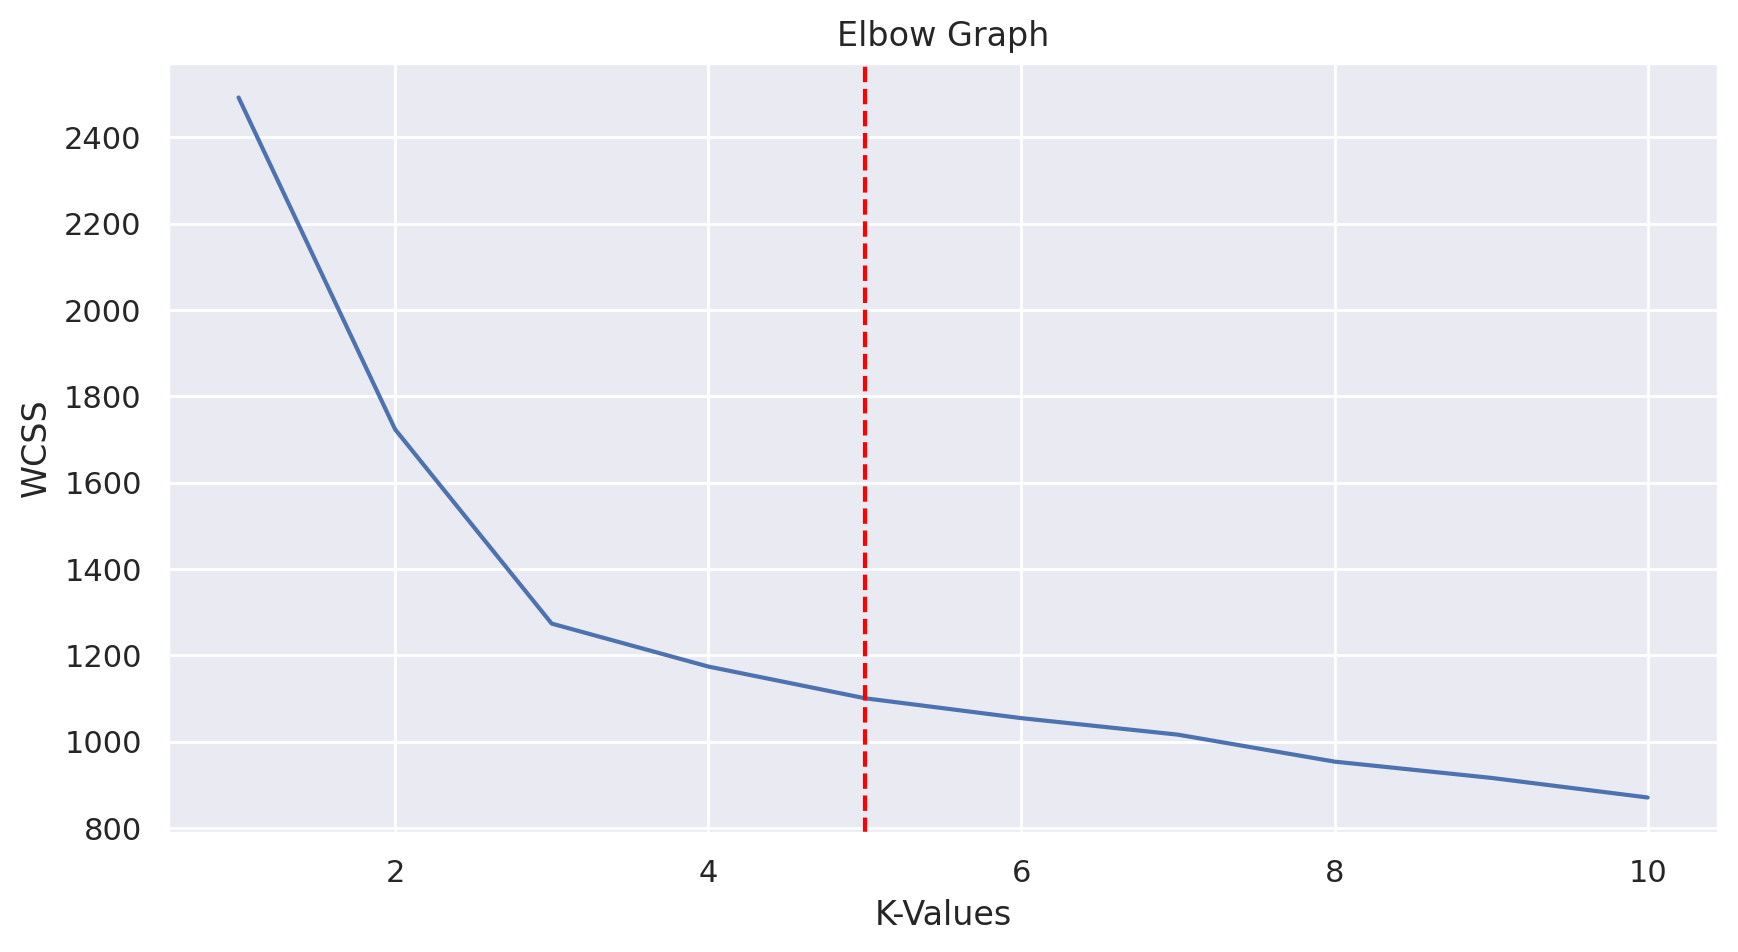

In [50]:
plt.plot(range(1,11),wcss)
plt.axvline(x = 5, linestyle = '--', color = 'red')
plt.xlabel('K-Values')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [51]:
km = KMeans(n_clusters=5)
ypred = km.fit_predict(x)
ypred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 4, 2, 2, 4, 4,
       2, 2, 4, 2, 4, 3, 2, 1, 3, 2, 2, 4, 2, 3, 2, 2, 4, 0, 3, 2, 4, 4,
       4, 4, 4, 4, 4, 3, 2, 1, 3, 2, 2, 3, 2, 2, 3, 2, 2, 4, 2, 4, 2, 3,
       3, 3, 4, 4, 4, 4, 2, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 3, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [52]:
km.cluster_centers_

array([[ 1.32210821,  0.17711479,  0.9157637 ,  0.2239077 ,  0.56486352,
        -0.06303211, -0.99010047, -1.22711807,  0.71348704, -0.77197379,
         0.95596981, -1.19572245, -1.28939841, -0.39632062],
       [-1.17081351,  0.8878039 , -0.3340102 ,  0.33246217, -0.6813839 ,
         0.58935808,  0.88190348,  0.94931446, -0.5897288 ,  0.60476031,
         0.18829748,  0.50718121,  0.77069651,  1.18120327],
       [ 0.07996036, -0.72151362, -0.8695036 , -1.51547413, -0.46344062,
        -0.53992464, -0.04511499,  0.02343161, -0.63153596, -0.04839707,
        -0.74897547,  0.72371845,  0.34827376, -0.73181673],
       [ 0.02370366, -0.93526817,  0.35598445,  0.03375879,  0.56963769,
        -0.28314636,  0.45718112,  0.49049439, -0.35827124,  0.5905952 ,
        -0.97422336, -0.11145549,  0.64304443, -0.84701233],
       [ 0.07996036, -1.09172692, -0.63348328,  0.1334699 ,  0.46351479,
        -0.60360211, -0.58575938, -0.33742101,  1.02158824, -0.46170391,
        -0.88467119,  0.69

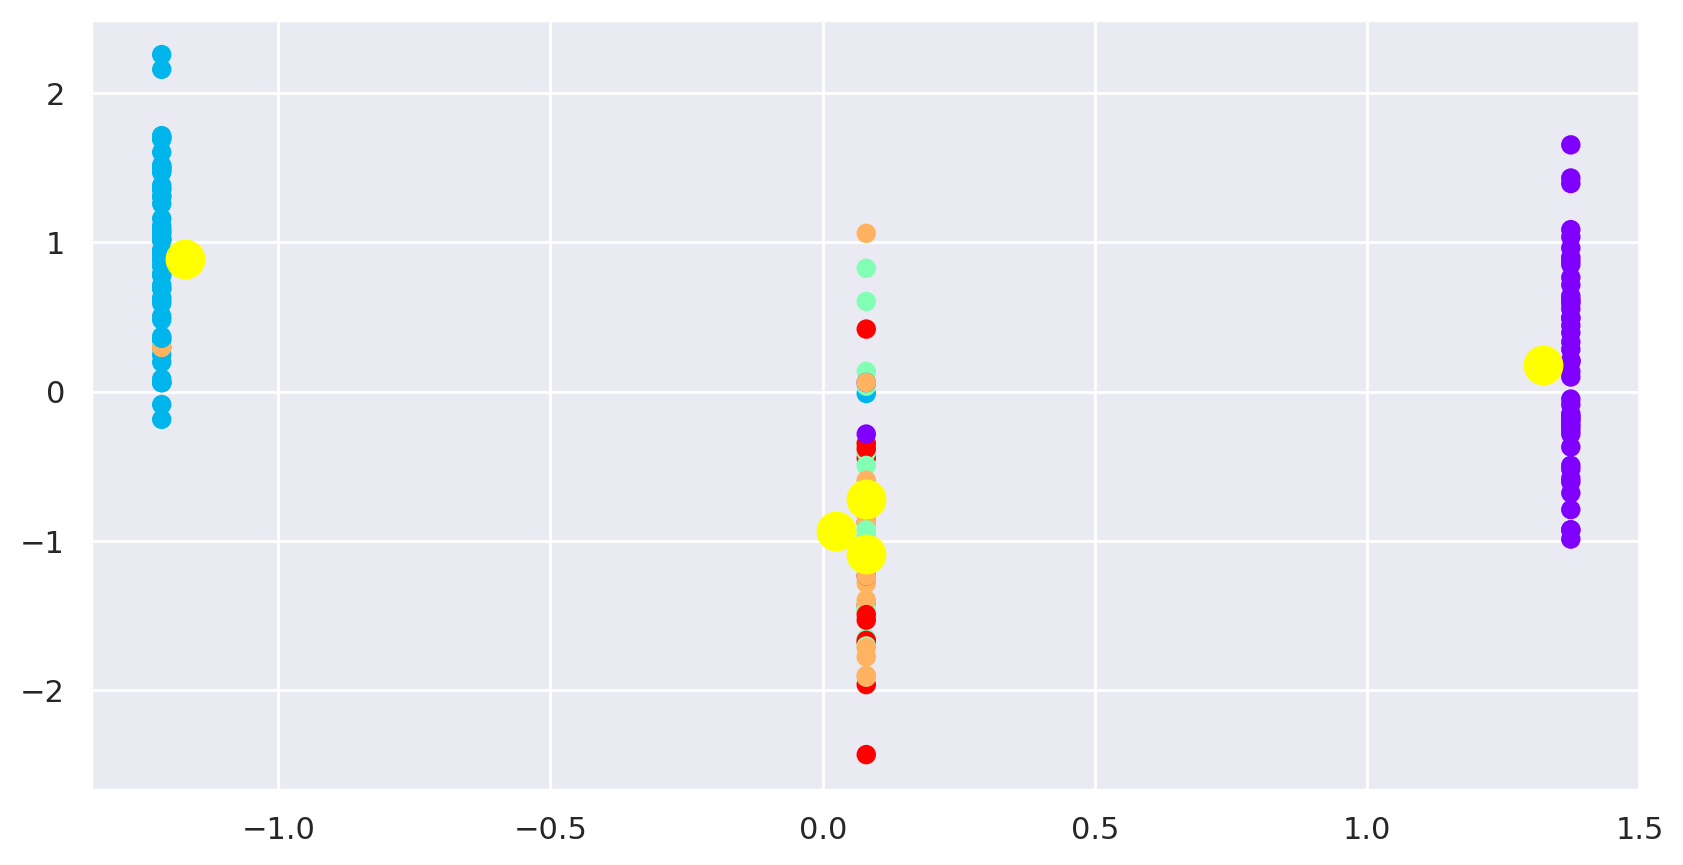

In [53]:
plt.scatter(x[:,0],x[:,1], c = ypred, cmap='rainbow')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], c = 'yellow',s = 178)

In [54]:
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
X, labels = make_blobs(n_samples=178, centers=5, random_state=42)

# Calculate Silhouette Score
silhouette_avg = silhouette_score(X, labels)

# Print the result
print(f'Silhouette Score: {silhouette_avg:.4f}')


Silhouette Score: 0.6752
